### https://www.kaggle.com/c/nfl-big-data-bowl-2022/data

In [1]:
# import zipfile
# with zipfile.ZipFile("./data/nfl-big-data-bowl-2022.zip", 'r') as zip_ref:
#     zip_ref.extractall('./data/')



In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/tracking2019.csv
./data/tracking2018.csv
./data/PFFScoutingData.csv
./data/plays.csv
./data/tracking2020.csv
./data/players.csv
./data/games.csv
./data/nfl-big-data-bowl-2022.zip


In [3]:
data_track_2019 = pd.read_csv('./data/tracking2019.csv')
data_track_2018 = pd.read_csv('./data/tracking2018.csv')
data_track_2020 = pd.read_csv('./data/tracking2020.csv')

data_PFFScouting = pd.read_csv('./data/PFFScoutingData.csv')
data_plays = pd.read_csv('./data/plays.csv')
data_players = pd.read_csv('./data/players.csv')
data_games = pd.read_csv('./data/games.csv')


## Exploring data

In [4]:
data_track_2018.head(2)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right


In [5]:
data_track_2019.head(2)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2019-12-29T21:25:27.400,68.39,20.20,0.16,0.31,0.02,320.08,322.40,None,36060.0,Anthony Levine,41.0,DB,home,1,2019122900,36,right
1,2019-12-29T21:25:27.500,68.38,20.21,0.16,0.28,0.02,321.66,309.87,None,36060.0,Anthony Levine,41.0,DB,home,2,2019122900,36,right


In [6]:
data_track_2020.head(2)

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2021-01-03T18:03:02.200,61.21,46.77,0.08,0.13,0.01,186.21,144.73,None,42901.0,Dean Marlowe,31.0,SS,home,1,2021010300,40,left
1,2021-01-03T18:03:02.300,61.22,46.77,0.11,0.19,0.01,184.87,126.09,None,42901.0,Dean Marlowe,31.0,SS,home,2,2021010300,40,left


In [7]:
data_PFFScouting.head(2)

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC


In [8]:
data_plays.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18


In [9]:
data_players.head(2)

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier


In [10]:
data_games.head(2)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF


In [11]:
def resumetable(df):
    print(f'Shape : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'Feature'})
    summary['Num of null'] = df.isnull().sum().values
    summary['Num of unique'] = df.nunique().values
    summary['First value'] = df.loc[0].values
    summary['Second value'] = df.loc[1].values
    summary['Third value'] = df.loc[2].values
    return summary



In [12]:
def write_percent(ax, total_size):
    '''Traverse the figure object and display the ratio at the top of the bar graph.'''
    for patch in ax.patches:
        height = patch.get_height() # Figure height (number of data)
        width = patch.get_width() # Figure width
        left_coord = patch.get_x() # The x-axis position on the left edge of the figure
        percent = height/total_size*100 # percent
        
        # Type text in the (x, y) coordinates
        ax.text(x=left_coord + width/2.0, # x-axis position
                y=height + total_size*0.001, # y-axis position
                s=f'{percent:1.1f}%', # Text
                ha='center') # in the middle

In [13]:
data_games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN
...,...,...,...,...,...,...,...
759,2021010311,2020,17,01/03/2021,16:25:00,DEN,LV
760,2021010312,2020,17,01/03/2021,16:25:00,HOU,TEN
761,2021010313,2020,17,01/03/2021,16:25:00,IND,JAX
762,2021010314,2020,17,01/03/2021,16:25:00,LA,ARI


In [14]:
data_games['month'] = data_games['gameDate'].apply(lambda x: int(x.split('/')[0]))
data_games['day'] = data_games['gameDate'].apply(lambda x: int(x.split('/')[1]))
data_games['hour'] = data_games['gameTimeEastern'].apply(lambda x: int(x.split(':')[0]))


In [15]:
resumetable(data_games)

Shape : (764, 10)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,gameId,int64,0,764,2018090600,2018090900,2018090901
1,season,int64,0,3,2018,2018,2018
2,week,int64,0,17,1,1,1
3,gameDate,object,0,151,09/06/2018,09/09/2018,09/09/2018
4,gameTimeEastern,object,0,16,20:20:00,13:00:00,13:00:00
5,homeTeamAbbr,object,0,33,PHI,BAL,CLE
6,visitorTeamAbbr,object,0,33,ATL,BUF,PIT
7,month,int64,0,5,9,9,9
8,day,int64,0,31,6,9,9
9,hour,int64,0,10,20,13,13


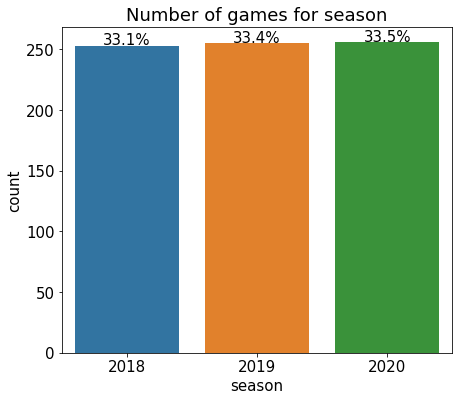

In [16]:
mpl.rc('font', size=15) 
plt.figure(figsize=(7, 6)) 

ax = sns.countplot(x='season', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for season');

### As the years go by, the number of games increases


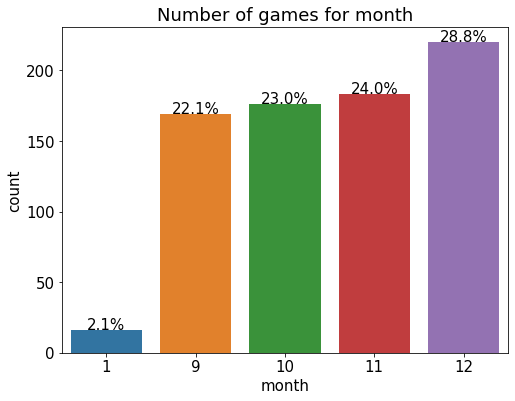

In [17]:
mpl.rc('font', size=15)
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='month', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for month');

#### The game was held from September to January. There are especially many games in December, and they are rarely held in January

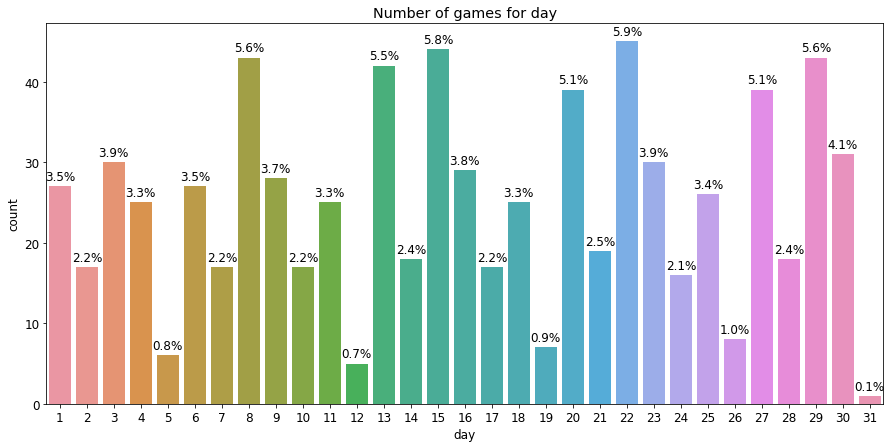

In [18]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='day', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for day');

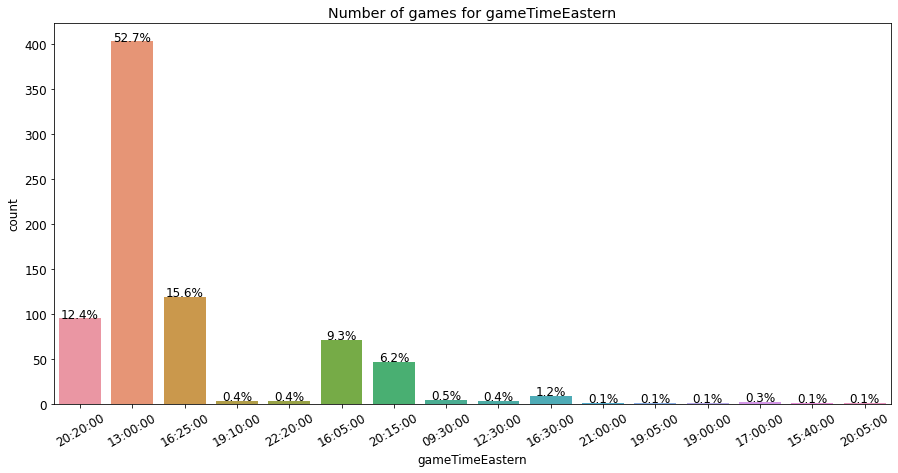

In [19]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='gameTimeEastern', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for gameTimeEastern');
ax.tick_params('x', labelrotation=30) # rotate 30 degree of x label

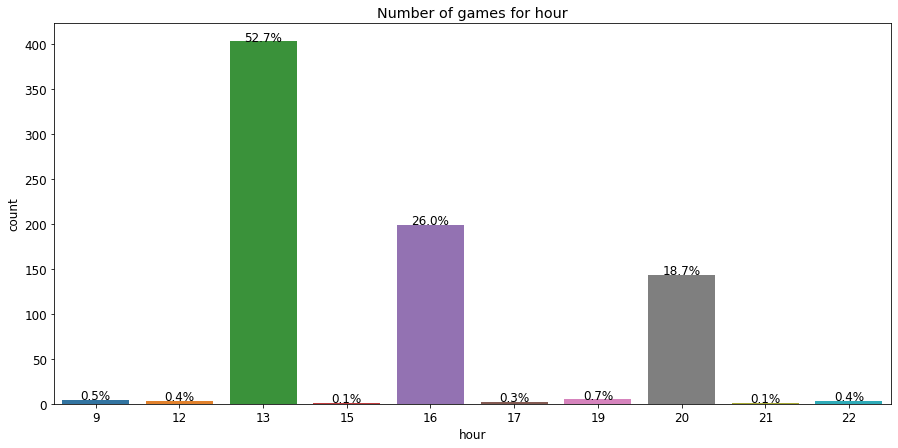

In [20]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='hour', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for hour');

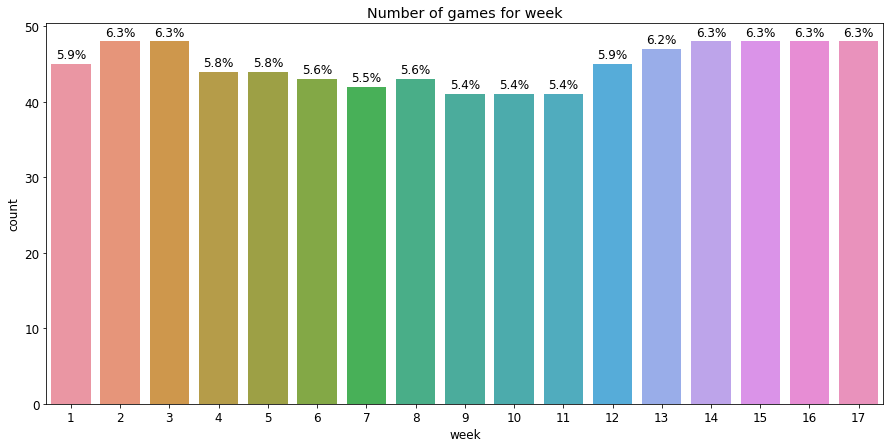

In [21]:
mpl.rc('font', size=12) 
plt.figure(figsize=(15, 7))

ax = sns.countplot(x='week', data=data_games)
write_percent(ax, len(data_games))
ax.set_title('Number of games for week');


Player data: The players.csv file contains player-level information from players that participated in any of the tracking data files. The key variable is nflId
nflId: Player identification number, unique across players (numeric)

height: Player height (text)

weight: Player weight (numeric)

birthDate: Date of birth (YYYY-MM-DD)

collegeName: Player college (text)

position: Player position (text)

displayName: Player name (text)

In [22]:
resumetable(data_players)


Shape : (2732, 7)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,nflId,int64,0,2732,42901,43501,43534
1,height,object,0,30,6-1,6-0,6-0
2,weight,int64,0,187,208,220,205
3,birthDate,object,17,2035,1992-07-25,1994-08-11,1993-06-02
4,collegeName,object,8,322,James Madison,Central Michigan,Illinois
5,Position,object,0,26,SS,FS,SS
6,displayName,object,0,2718,Dean Marlowe,Kavon Frazier,Clayton Fejedelem


In [23]:
check = data_players['height'].str.split('-', expand=True)

check.columns = ['first', 'second']

check.loc[(check['second'].notnull()), 'first'] = check[check['second'].notnull()]['first'].astype(np.int16) * 12 + check[check['second'].notnull()]['second'].astype(np.int16)

In [24]:
check

,first,second
0,73,1
1,72,0
2,72,0
3,73,1
4,73,1
...,...,...
2727,75,3
2728,75,3
2729,69,9
2730,73,None


In [25]:
data_players['height'] = check['first']
data_players['height'] = data_players['height'].astype(np.float32)
data_players['height'] /= 12

data_players

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6.083333,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6.000000,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6.000000,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6.083333,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6.083333,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6.250000,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6.250000,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5.750000,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,6.083333,230,1992-10-20,LSU,RB,Jeremy Hill


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


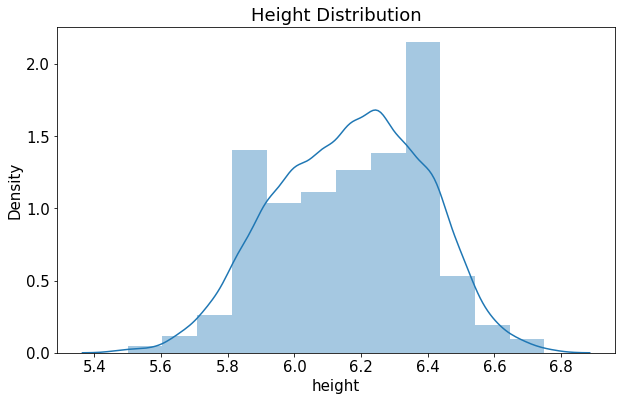

In [26]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 6))

ax = sns.distplot(data_players['height'], bins=12)
ax.set_title('Height Distribution');

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


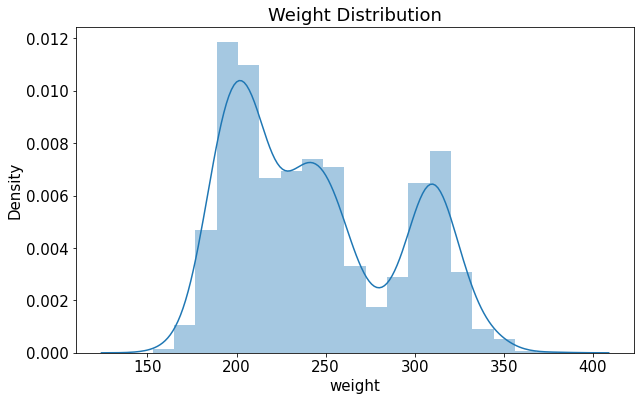

In [27]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 6))

ax = sns.distplot(data_players['weight'])
ax.set_title('Weight Distribution');

In [28]:
top_players_colleage = data_players['collegeName'].value_counts()[:20].reset_index()
top_players_colleage.columns = ['collageName', 'numberOfPlayers']
top_players_colleage

,collageName,numberOfPlayers
0,Alabama,69
1,Ohio State,56
2,Florida,55
3,Louisiana State,52
4,Georgia,47
5,Miami,45
6,Michigan,45
7,Penn State,45
8,Clemson,44
9,Notre Dame,44


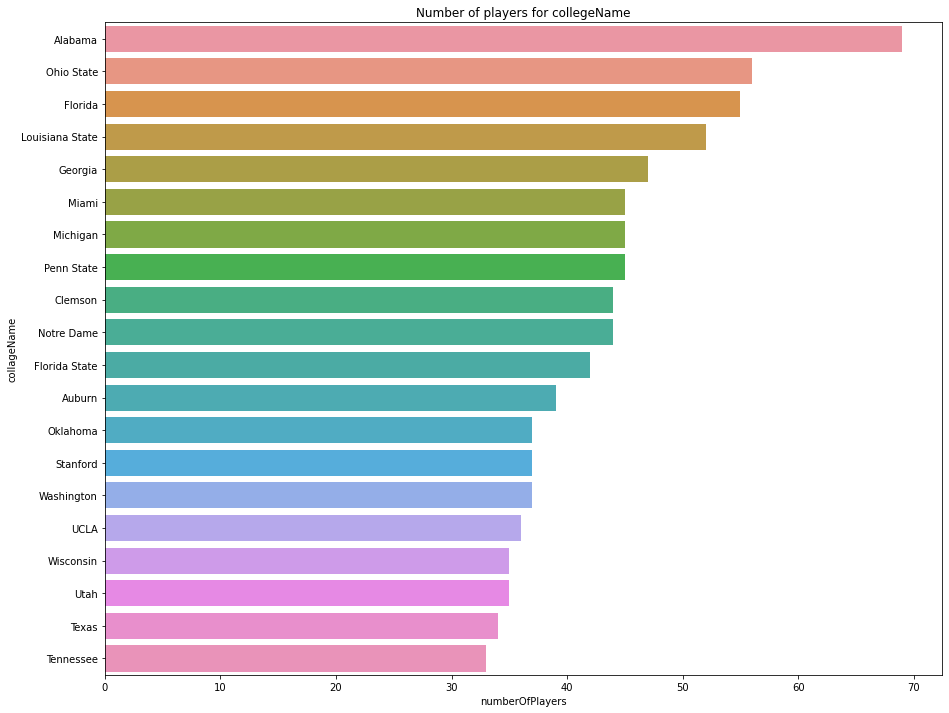

In [29]:
mpl.rc('font', size=10) 
plt.figure(figsize=(15, 12))

ax = sns.barplot(x='numberOfPlayers', y='collageName', data=top_players_colleage)
ax.set_title('Number of players for collegeName');

In [30]:
data_players['birthYear'] = 0
data_players

,nflId,height,weight,birthDate,collegeName,Position,displayName,birthYear
0,42901,6.083333,208,1992-07-25,James Madison,SS,Dean Marlowe,0
1,43501,6.000000,220,1994-08-11,Central Michigan,FS,Kavon Frazier,0
2,43534,6.000000,205,1993-06-02,Illinois,SS,Clayton Fejedelem,0
3,43535,6.083333,235,1992-12-22,Temple,MLB,Tyler Matakevich,0
4,44174,6.083333,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,0
...,...,...,...,...,...,...,...,...
2727,33216,6.250000,320,06/16/1986,Central Florida,G,Josh Sitton,0
2728,33184,6.250000,265,05/02/1985,Winston-Salem State,DE,William Hayes,0
2729,45651,5.750000,198,06/16/1993,Iowa,WR,Riley McCarron,0
2730,41284,6.083333,230,1992-10-20,LSU,RB,Jeremy Hill,0


In [31]:
data_players.dropna(subset=['birthDate'], inplace=True)


In [32]:
for idx, row in data_players.iterrows():
    if len(row['birthDate'].split('/')) == 3: # ex) 05/17/1994 
        data_players.loc[idx, 'birthYear'] = row['birthDate'].split('/')[2]
        
    elif len(row['birthDate'].split('-')) == 3: # ex) 1995-05-05
        data_players.loc[idx, 'birthYear'] = row['birthDate'].split('-')[0]

In [33]:
 data_players

,nflId,height,weight,birthDate,collegeName,Position,displayName,birthYear
0,42901,6.083333,208,1992-07-25,James Madison,SS,Dean Marlowe,1992
1,43501,6.000000,220,1994-08-11,Central Michigan,FS,Kavon Frazier,1994
2,43534,6.000000,205,1993-06-02,Illinois,SS,Clayton Fejedelem,1993
3,43535,6.083333,235,1992-12-22,Temple,MLB,Tyler Matakevich,1992
4,44174,6.083333,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,1993
...,...,...,...,...,...,...,...,...
2727,33216,6.250000,320,06/16/1986,Central Florida,G,Josh Sitton,1986
2728,33184,6.250000,265,05/02/1985,Winston-Salem State,DE,William Hayes,1985
2729,45651,5.750000,198,06/16/1993,Iowa,WR,Riley McCarron,1993
2730,41284,6.083333,230,1992-10-20,LSU,RB,Jeremy Hill,1992


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


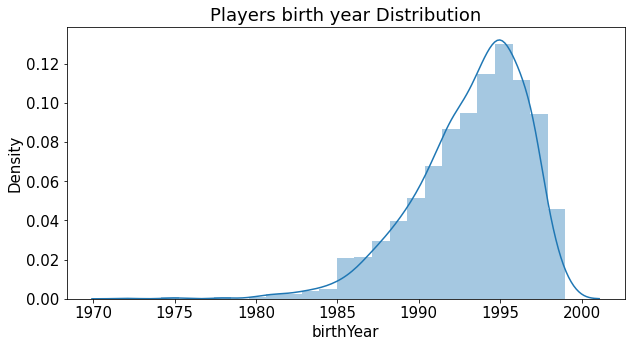

In [34]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(data_players['birthYear'], bins=25)
ax.set_title('Players birth year Distribution');

In [35]:

data_players['birthYear'].min(), data_players['birthYear'].max()


('1972', '1999')

### Play data: The plays.csv file contains play-level information from each game. The key variables are gameId and playId

gameId: Game identifier, unique (numeric)

playId: Play identifier, not unique across games (numeric)

playDescription: Description of play (text)

quarter: Game quarter (numeric)

down: Down (numeric)

yardsToGo: Distance needed for a first down (numeric)

possessionTeam: Team punting, placekicking or kicking off the ball (text)

specialTeamsPlayType: Formation of play: Extra Point, Field Goal, Kickoff or Punt (text)

specialTeamsPlayResult: Special Teams outcome of play dependent on play type: Blocked Kick Attempt, Blocked Punt, Downed, Fair Catch, Kick Attempt Good, Kick Attempt No Good, Kickoff Team Recovery, Muffed, Non-Special Teams Result, Out of Bounds, Return or Touchback (text)

kickerId: nflId of placekicker, punter or kickoff specialist on play (numeric)

returnerId: nflId(s) of returner(s) on play if there was a special teams return. Multiple returners on a play are separated by a ; (text)

kickBlockerId: nflId of blocker of kick on play if there was a blocked field goal or blocked punt (numeric)
yardlineSide: 3-letter team code corresponding to line-of-scrimmage (text)

yardlineNumber: Yard line at line-of-scrimmage (numeric)
gameClock: Time on clock of play (MM:SS)
penaltyCodes: NFL categorization of the penalties that occurred on the play. Multiple penalties on a play are separated by a ; (text)
penaltyJerseyNumber: Jersey number and team code of the player committing each penalty. Multiple penalties on a play are separated by a ; (text)

penaltyYards: yards gained by possessionTeam by penalty (numeric)
preSnapHomeScore: Home score prior to the play (numeric)
preSnapVisitorScore: Visiting team score prior to the play (numeric)
passResult: Scrimmage outcome of the play if specialTeamsPlayResult is "Non-Special Teams Result" (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, R: Scramble, ' ': Designed Rush, text)

kickLength: Kick length in air of kickoff, field goal or punt (numeric)

kickReturnYardage: Yards gained by return team if there was a return on a kickoff or punt (numeric)

playResult: Net yards gained by the kicking team, including penalty yardage (numeric)

absoluteYardlineNumber: Location of ball downfield in tracking data coordinates (numeric)

In [36]:
data_plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,3,05:03:00,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,2021010315,3683,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,02:20:00,NaN,NaN,NaN,16,19,NaN,75.0,NaN,40,75
19975,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,NaN,NaN,SF,15,01:49:00,NaN,NaN,NaN,16,25,NaN,NaN,NaN,0,25
19976,2021010315,3886,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,01:49:00,NaN,NaN,NaN,16,26,NaN,75.0,NaN,40,75
19977,2021010315,4166,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,0,0,SF,Extra Point,Kick Attempt Good,47590.0,NaN,NaN,SEA,15,00:23:00,NaN,NaN,NaN,22,26,NaN,NaN,NaN,0,95


In [37]:
resumetable(data_plays)


Shape : (19979, 25)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,gameId,int64,0,764,2018090600,2018090600,2018090600
1,playId,int64,0,4435,37,366,658
2,playDescription,object,0,12355,J.Elliott kicks 65 yards from PHI 35 to end zo...,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...","(5:03) M.Bryant 21 yard field goal is GOOD, Ce..."
3,quarter,int64,0,5,1,1,1
4,down,int64,0,5,0,4,4
5,yardsToGo,int64,0,38,0,4,3
6,possessionTeam,object,0,33,PHI,PHI,ATL
7,specialTeamsPlayType,object,0,4,Kickoff,Punt,Field Goal
8,specialTeamsResult,object,0,12,Touchback,Return,Kick Attempt Good
9,kickerId,float64,101,111,44966.0,45603.0,27091.0


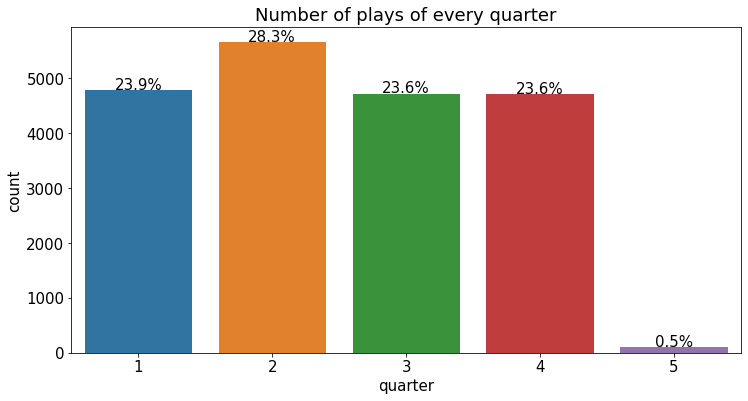

In [38]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='quarter', data=data_plays)
write_percent(ax, len(data_plays))
ax.set_title('Number of plays of every quarter');

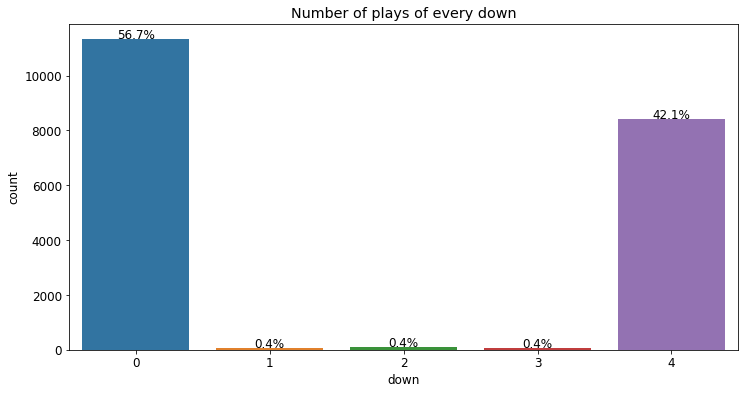

In [39]:
mpl.rc('font', size=12) 
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='down', data=data_plays)
write_percent(ax, len(data_plays))
ax.set_title('Number of plays of every down');

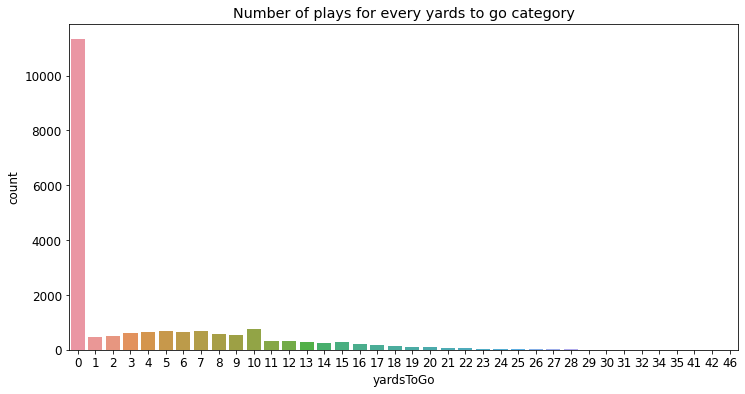

In [40]:
mpl.rc('font', size=12) 
plt.figure(figsize=(12, 6))

ax = sns.countplot(x='yardsToGo', data=data_plays)
ax.set_title('Number of plays for every yards to go category');

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'playResult Distribution')

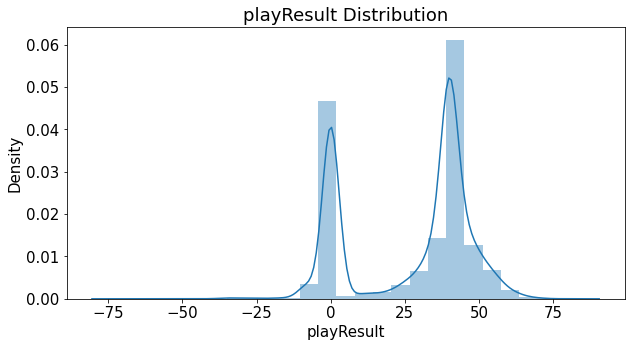

In [41]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(data_plays['playResult'], bins=25);
ax.set_title('playResult Distribution')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


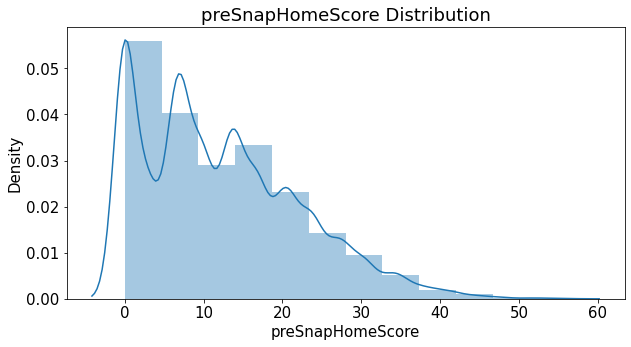

In [42]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(data_plays['preSnapHomeScore'], bins=12);
ax.set_title('preSnapHomeScore Distribution'); 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


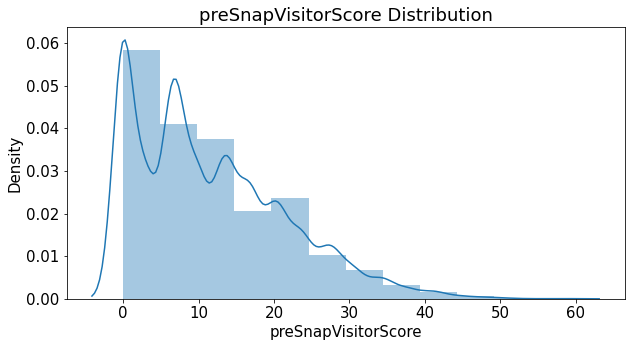

In [43]:
mpl.rc('font', size=15) 
plt.figure(figsize=(10, 5))

ax = sns.distplot(data_plays['preSnapVisitorScore'], bins=12);
ax.set_title('preSnapVisitorScore Distribution'); 

# deeper dive in specialTeamsPlayType

In [44]:
data_plays['specialTeamsPlayType'].value_counts()

Kickoff        7843
Punt           5991
Extra Point    3488
Field Goal     2657
Name: specialTeamsPlayType, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='specialTeamsPlayType', ylabel='count'>

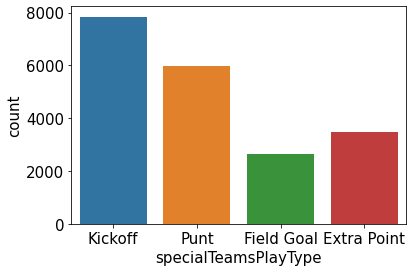

In [45]:
sns.countplot(data_plays['specialTeamsPlayType'])

## kick offs

In [46]:
kickoff_df=data_plays[data_plays['specialTeamsPlayType'] == 'Kickoff']
kickoff_df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
7,2018090600,1387,J.Elliott kicks 65 yards from PHI 35 to end zo...,2,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,06:09:00,NaN,NaN,NaN,3,3,NaN,72.0,NaN,40,75
9,2018090600,1606,M.Bosher kicks 68 yards from ATL 35 to PHI -3....,2,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,02:08:00,OH,PHI 29,5.0,3,6,NaN,68.0,13.0,60,45
12,2018090600,2225,M.Bosher kicks 65 yards from ATL 35 to end zon...,3,0,0,ATL,Kickoff,Touchback,37267.0,NaN,NaN,ATL,35,15:00:00,NaN,NaN,NaN,3,6,NaN,71.0,NaN,40,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,2021010315,2847,M.Wishnowsky kicks 65 yards from SF 35 to end ...,4,0,0,SF,Kickoff,Touchback,47893.0,NaN,NaN,SF,35,14:22:00,NaN,NaN,NaN,16,6,NaN,75.0,NaN,40,45
19971,2021010315,3105,J.Myers kicks 63 yards from SEA 35 to SF 2. A....,4,0,0,SEA,Kickoff,Return,41175.0,48322,NaN,SEA,35,10:54:00,NaN,NaN,NaN,16,12,NaN,63.0,18.0,45,75
19974,2021010315,3683,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,02:20:00,NaN,NaN,NaN,16,19,NaN,75.0,NaN,40,75
19976,2021010315,3886,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,01:49:00,NaN,NaN,NaN,16,26,NaN,75.0,NaN,40,75


In [47]:
kickoff_drops = ["passResult",'specialTeamsPlayType','down','yardsToGo','kickBlockerId','possessionTeam','yardlineSide','yardlineNumber','playDescription']



#### passResult
#### specialTeamsPlayType
#### down
#### yardsToGo
#### kickBlockerId

#####     -all above is not nessessary

#### possessionTeam
#### yardlineSide
#### yardlineNumber
#####      -always 34

#### playDescription

In [48]:
kickoff_df.drop(kickoff_drops,axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
[f for f in kickoff_df.columns if kickoff_df[f].dtype == "O" ]

['specialTeamsResult',
 'returnerId',
 'gameClock',
 'penaltyCodes',
 'penaltyJerseyNumbers']

In [50]:
kickoff_df

,gameId,playId,quarter,specialTeamsResult,kickerId,returnerId,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,1,Touchback,44966.0,NaN,15:00:00,NaN,NaN,NaN,0,0,66.0,NaN,40,45
3,2018090600,677,1,Return,37267.0,44979,05:01:00,NaN,NaN,NaN,0,3,64.0,30.0,34,75
7,2018090600,1387,2,Touchback,44966.0,NaN,06:09:00,NaN,NaN,NaN,3,3,72.0,NaN,40,75
9,2018090600,1606,2,Return,37267.0,44979,02:08:00,OH,PHI 29,5.0,3,6,68.0,13.0,60,45
12,2018090600,2225,3,Touchback,37267.0,NaN,15:00:00,NaN,NaN,NaN,3,6,71.0,NaN,40,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19969,2021010315,2847,4,Touchback,47893.0,NaN,14:22:00,NaN,NaN,NaN,16,6,75.0,NaN,40,45
19971,2021010315,3105,4,Return,41175.0,48322,10:54:00,NaN,NaN,NaN,16,12,63.0,18.0,45,75
19974,2021010315,3683,4,Touchback,41175.0,NaN,02:20:00,NaN,NaN,NaN,16,19,75.0,NaN,40,75
19976,2021010315,3886,4,Touchback,41175.0,NaN,01:49:00,NaN,NaN,NaN,16,26,75.0,NaN,40,75


In [51]:
kickoff_df.drop(['gameId','playId','quarter','preSnapHomeScore','preSnapVisitorScore'],1).describe()

,kickerId,penaltyYards,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
count,7843.000000,356.000000,7843.000000,2969.000000,7843.000000,7843.000000
mean,41931.703940,4.752809,67.061456,21.720108,39.154278,59.973862
std,5113.717047,8.229498,11.256840,12.006462,8.277061,15.148334
min,23860.000000,-15.000000,2.000000,-16.000000,-35.000000,30.000000
25%,39470.000000,0.000000,65.000000,16.000000,40.000000,45.000000
50%,42508.000000,10.000000,70.000000,21.000000,40.000000,60.000000
75%,45153.000000,10.000000,75.000000,26.000000,40.000000,75.000000
max,52791.000000,15.000000,90.000000,104.000000,67.000000,90.000000


In [52]:
kickoff_df.drop(['gameId','playId','quarter','preSnapHomeScore','preSnapVisitorScore'],1).quantile(.5)

kickerId                  42508.0
penaltyYards                 10.0
kickLength                   70.0
kickReturnYardage            21.0
playResult                   40.0
absoluteYardlineNumber       60.0
Name: 0.5, dtype: float64

In [53]:
#kickoff_df.quantile(.50)

In [54]:
#kickoff_df['penaltyCodes'].value_counts()

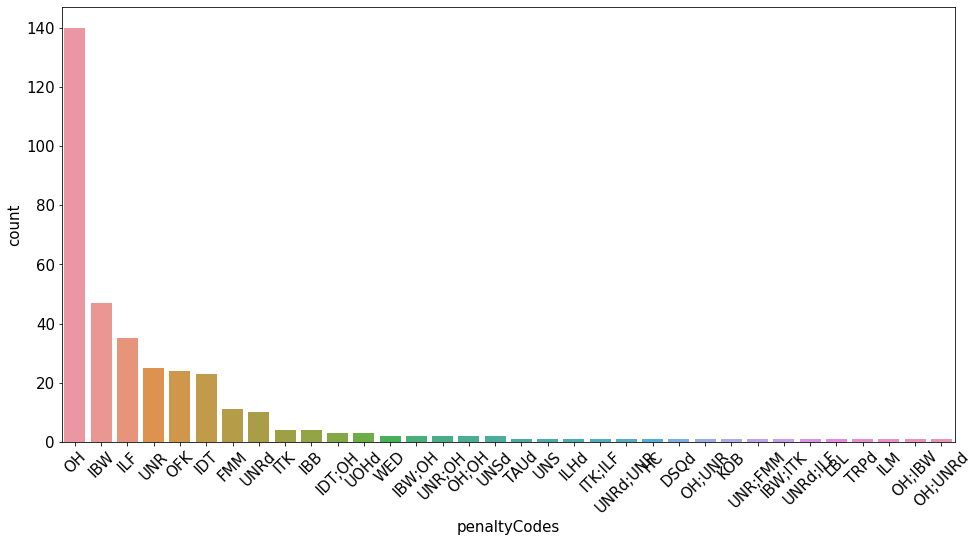

In [55]:
plt.figure(figsize=(16,8))
sns.countplot(data=kickoff_df,x='penaltyCodes',order = kickoff_df['penaltyCodes'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

In [56]:
total_pen = len(kickoff_df['penaltyCodes'])
# total_pen

In [57]:
for i in kickoff_df['penaltyCodes'].unique():
    print(f"{i} is called {len(kickoff_df[kickoff_df['penaltyCodes'] == i])/total_pen*100}")

nan is called 0.0
OH is called 1.7850312380466657
UNRd is called 0.12750223128904756
UNR;FMM is called 0.012750223128904755
ILF is called 0.44625780951166644
IBW is called 0.5992604870585235
LBL is called 0.012750223128904755
FMM is called 0.1402524544179523
UNR is called 0.3187555782226189
KOB is called 0.012750223128904755
WED is called 0.02550044625780951
OFK is called 0.3060053550937141
TAUd is called 0.012750223128904755
TRPd is called 0.012750223128904755
ILM is called 0.012750223128904755
UNR;OH is called 0.02550044625780951
OH;UNR is called 0.012750223128904755
ITK is called 0.05100089251561902
OH;UNRd is called 0.012750223128904755
OH;OH is called 0.02550044625780951
IBW;ITK is called 0.012750223128904755
ILHd is called 0.012750223128904755
UNSd is called 0.02550044625780951
IDT is called 0.2932551319648094
OH;IBW is called 0.012750223128904755
IDT;OH is called 0.038250669386714266
IBB is called 0.05100089251561902
UOHd is called 0.038250669386714266
UNS is called 0.0127502231

## OH is called 1.7850312380466657

OH is called most the time

In [58]:
kickoff_df.groupby('specialTeamsResult').count()

,gameId,playId,quarter,kickerId,returnerId,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
specialTeamsResult,,,,,,,,,,,,,,,
Downed,4,4,4,4,0,4,4,4,4,4,4,4,0,4,4
Fair Catch,5,5,5,5,5,5,0,0,0,5,5,5,0,5,5
Kickoff Team Recovery,16,16,16,16,0,16,0,0,0,16,16,16,0,16,16
Muffed,60,60,60,60,59,60,1,1,1,60,60,60,54,60,60
Out of Bounds,64,64,64,64,0,64,2,2,2,64,64,64,0,64,64
Return,2921,2921,2921,2921,2794,2921,308,308,308,2921,2921,2921,2915,2921,2921
Touchback,4773,4773,4773,4773,0,4773,41,41,41,4773,4773,4773,0,4773,4773


In [59]:
punt_df=data_plays[data_plays['specialTeamsPlayType'] == 'Punt']
punt_df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
5,2018090600,973,"(14:18) M.Bosher punts 49 yards to PHI 40, Cen...",2,4,19,ATL,Punt,Fair Catch,37267.0,29957,NaN,ATL,11,14:18:00,NaN,NaN,NaN,0,3,NaN,49.0,NaN,49,21
10,2018090600,1850,"(1:30) C.Johnston punts 58 yards to ATL 11, Ce...",2,4,8,PHI,Punt,Downed,45603.0,NaN,NaN,PHI,31,01:30:00,NaN,NaN,NaN,3,6,NaN,58.0,NaN,58,79
11,2018090600,1989,"(:44) M.Bosher punts 57 yards to PHI 17, Cente...",2,4,8,ATL,Punt,Return,37267.0,29957,NaN,ATL,26,00:44:00,UNR,PHI 50,12.0,3,6,NaN,57.0,8.0,61,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,2021010315,1359,"(8:17) M.Wishnowsky punts 45 yards to SEA 35, ...",2,4,15,SF,Punt,Return,47893.0,46211,NaN,SF,20,08:17:00,IBW,SEA 18,10.0,0,6,NaN,45.0,7.0,48,90
19958,2021010315,1479,"(6:47) M.Dickson punts 61 yards to SF 16, Cent...",2,4,19,SEA,Punt,Return,46218.0,45900,NaN,SEA,23,06:47:00,NaN,NaN,NaN,0,6,NaN,61.0,5.0,56,33
19964,2021010315,2235,"(8:39) M.Dickson punts 43 yards to SF 30, Cent...",3,4,8,SEA,Punt,Return,46218.0,45900,NaN,SEA,27,08:39:00,NaN,NaN,NaN,6,6,NaN,43.0,21.0,22,37
19967,2021010315,2497,"(5:17) M.Dickson punts 52 yards to SF 22, Cent...",3,4,9,SEA,Punt,Return,46218.0,45900,NaN,SEA,26,05:17:00,NaN,NaN,NaN,9,6,NaN,52.0,5.0,47,36


In [60]:
for i in punt_df['penaltyCodes'].unique():
    print(f"{i} is called {len(punt_df[punt_df['penaltyCodes'] == i])/total_pen*100}")

UNSd is called 0.17850312380466657
nan is called 0.0
UNR is called 0.19125334693357135
FMM is called 0.17850312380466657
OH;OH is called 0.038250669386714266
KCI is called 0.12750223128904756
OH is called 3.187555782226189
IBW is called 2.1675379319138086
IBW;UNR is called 0.012750223128904755
UNS is called 0.08925156190233328
DOF is called 0.10200178503123804
UNRd is called 0.2805049088359046
IBB is called 0.1402524544179523
ITK is called 0.16575290067576182
IBW;IBW is called 0.07650133877342853
FMM;OH is called 0.012750223128904755
OH;IBW is called 0.02550044625780951
FCI is called 0.15300267754685706
IDK is called 0.1147520081601428
RNK is called 0.15300267754685706
ILH is called 0.02550044625780951
ILF is called 0.10200178503123804
POK is called 0.15300267754685706
OH;UNR is called 0.012750223128904755
TRPd is called 0.02550044625780951
UNRd;OH is called 0.02550044625780951
OH;IFC is called 0.012750223128904755
HC is called 0.012750223128904755
KCI;IBW is called 0.01275022312890475

In [61]:
fg_df=data_plays[data_plays['specialTeamsPlayType'] == 'Field Goal']
fg_df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,3,05:03:00,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
6,2018090600,1368,"(6:12) J.Elliott 26 yard field goal is GOOD, C...",2,4,8,PHI,Field Goal,Kick Attempt Good,44966.0,NaN,NaN,ATL,8,06:12:00,NaN,NaN,NaN,0,3,NaN,26.0,NaN,0,18
8,2018090600,1587,"(2:13) M.Bryant 52 yard field goal is GOOD, Ce...",2,4,17,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,34,02:13:00,NaN,NaN,NaN,3,3,NaN,52.0,NaN,0,76
33,2018090900,1226,(13:18) (Field Goal formation) J.Tucker 41 yar...,2,4,13,BAL,Field Goal,Kick Attempt Good,39470.0,NaN,NaN,BUF,23,13:18:00,NaN,NaN,NaN,14,0,NaN,41.0,NaN,0,33
36,2018090900,1613,(8:48) (Field Goal formation) S.Hauschka 52 ya...,2,4,9,BUF,Field Goal,Kick Attempt No Good,33469.0,NaN,NaN,BAL,34,08:48:00,NaN,NaN,NaN,17,0,NaN,52.0,NaN,-8,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19952,2021010315,811,"(2:13) J.Myers 36 yard field goal is GOOD, Cen...",1,4,10,SEA,Field Goal,Kick Attempt Good,41175.0,NaN,NaN,SF,17,02:13:00,NaN,NaN,NaN,0,0,NaN,36.0,NaN,0,27
19955,2021010315,1243,"(9:31) J.Myers 30 yard field goal is GOOD, Cen...",2,4,3,SEA,Field Goal,Kick Attempt Good,41175.0,NaN,NaN,SF,12,09:31:00,NaN,NaN,NaN,0,3,NaN,30.0,NaN,0,98
19959,2021010315,1784,"(:29) T.Vizcaino 36 yard field goal is GOOD, C...",2,4,6,SF,Field Goal,Kick Attempt Good,47590.0,NaN,NaN,SEA,18,00:29:00,NaN,NaN,NaN,0,6,NaN,36.0,NaN,0,28
19962,2021010315,2121,"(9:36) T.Vizcaino 47 yard field goal is GOOD, ...",3,4,8,SF,Field Goal,Kick Attempt Good,47590.0,NaN,NaN,SEA,29,09:36:00,NaN,NaN,NaN,3,6,NaN,47.0,NaN,0,39


In [62]:
for i in kickoff_df['penaltyCodes'].unique():
    print(f"{i} is called {len(fg_df[fg_df['penaltyCodes'] == i])/total_pen*100}")

nan is called 0.0
OH is called 0.012750223128904755
UNRd is called 0.06375111564452378
UNR;FMM is called 0.0
ILF is called 0.06375111564452378
IBW is called 0.02550044625780951
LBL is called 0.0
FMM is called 0.0
UNR is called 0.012750223128904755
KOB is called 0.0
WED is called 0.0
OFK is called 0.0
TAUd is called 0.0
TRPd is called 0.0
ILM is called 0.0
UNR;OH is called 0.0
OH;UNR is called 0.0
ITK is called 0.0
OH;UNRd is called 0.0
OH;OH is called 0.0
IBW;ITK is called 0.0
ILHd is called 0.0
UNSd is called 0.0
IDT is called 0.0
OH;IBW is called 0.0
IDT;OH is called 0.0
IBB is called 0.0
UOHd is called 0.0
UNS is called 0.0
ITK;ILF is called 0.0
UNRd;UNR is called 0.0
DSQd is called 0.0
HC is called 0.0
UNRd;ILF is called 0.0
IBW;OH is called 0.0


In [63]:
extra_df=data_plays[data_plays['specialTeamsPlayType'] == 'Extra Point']
extra_df

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
15,2018090600,2883,"J.Elliott extra point is GOOD, Center-R.Lovato...",3,0,0,PHI,Extra Point,Kick Attempt Good,44966.0,NaN,NaN,ATL,15,04:37:00,NaN,NaN,NaN,9,6,NaN,NaN,NaN,0,25
19,2018090600,3553,"M.Bryant extra point is No Good, Hit Right Upr...",4,0,0,ATL,Extra Point,Kick Attempt No Good,27091.0,NaN,NaN,PHI,15,09:48:00,NaN,NaN,NaN,10,12,NaN,NaN,NaN,0,25
25,2018090900,380,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,0,0,BAL,Extra Point,Kick Attempt Good,39470.0,NaN,NaN,BUF,15,08:42:00,NaN,NaN,NaN,6,0,NaN,NaN,NaN,0,95
30,2018090900,972,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",1,0,0,BAL,Extra Point,Kick Attempt Good,39470.0,NaN,NaN,BUF,15,01:32:00,NaN,NaN,NaN,13,0,NaN,NaN,NaN,0,95
44,2018090900,2757,"J.Tucker extra point is GOOD, Center-M.Cox, Ho...",3,0,0,BAL,Extra Point,Kick Attempt Good,39470.0,NaN,NaN,BUF,15,12:28:00,NaN,NaN,NaN,32,0,NaN,NaN,NaN,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19968,2021010315,2813,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,0,0,SF,Extra Point,Kick Attempt Good,47590.0,NaN,NaN,SEA,15,14:22:00,NaN,NaN,NaN,15,6,NaN,NaN,NaN,0,95
19970,2021010315,3074,"J.Myers extra point is No Good, Wide Left, Cen...",4,0,0,SEA,Extra Point,Kick Attempt No Good,41175.0,NaN,NaN,SF,15,10:54:00,NaN,NaN,NaN,16,12,NaN,NaN,NaN,0,25
19973,2021010315,3667,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,NaN,NaN,SF,15,02:20:00,NaN,NaN,NaN,16,18,NaN,NaN,NaN,0,25
19975,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,NaN,NaN,SF,15,01:49:00,NaN,NaN,NaN,16,25,NaN,NaN,NaN,0,25


In [64]:
spteam_type = [kickoff_df,punt_df,fg_df,extra_df]

In [65]:
# sns.countplot(data=kickoff_df,x='penaltyCodes',order = kickoff_df['penaltyCodes'].value_counts().index)


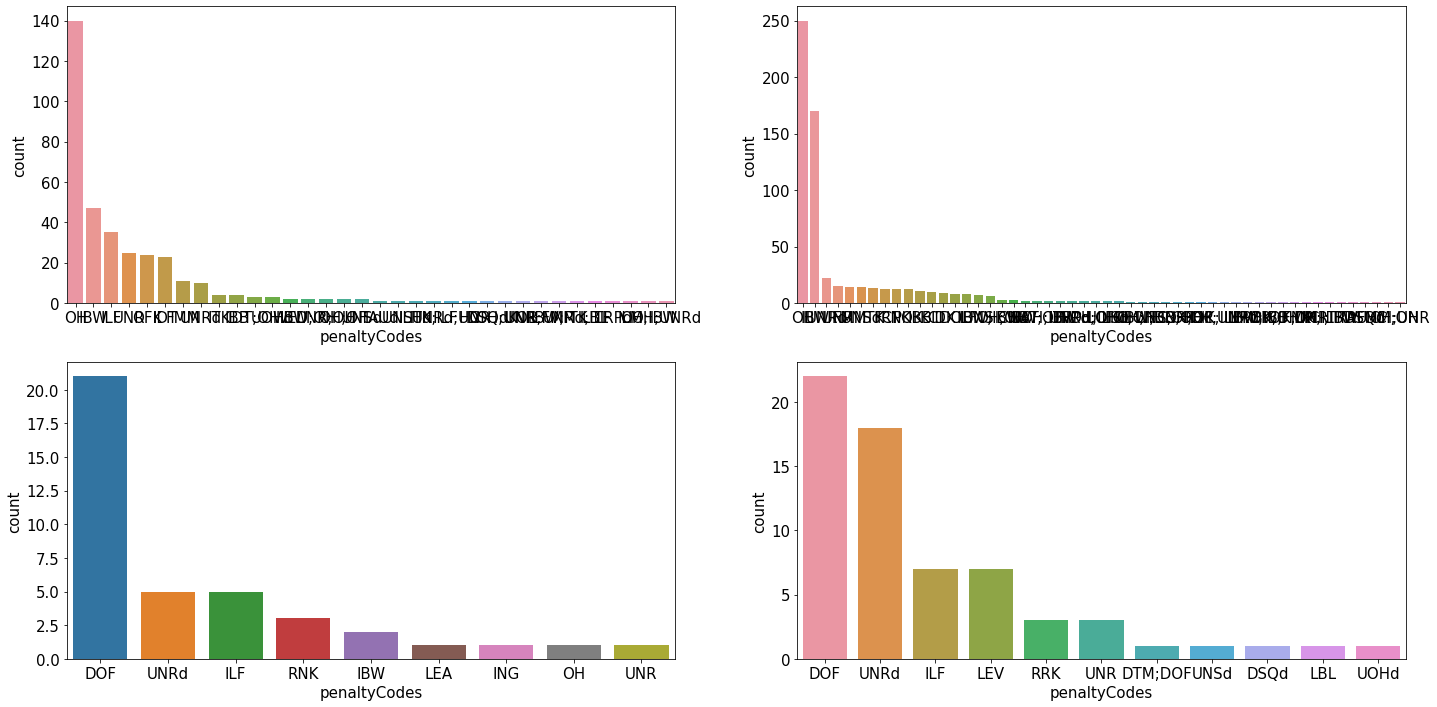

In [66]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
sns.countplot(data=spteam_type[0],x='penaltyCodes',order = spteam_type[0]['penaltyCodes'].value_counts().index,ax=ax[0, 0])
sns.countplot(data=spteam_type[1],x='penaltyCodes',order = spteam_type[1]['penaltyCodes'].value_counts().index,ax=ax[0, 1])
sns.countplot(data=spteam_type[2],x='penaltyCodes',order = spteam_type[2]['penaltyCodes'].value_counts().index,ax=ax[1, 0])
sns.countplot(data=spteam_type[3],x='penaltyCodes',order = spteam_type[3]['penaltyCodes'].value_counts().index,ax=ax[1, 1])

#     ax[1,0].plot(x, y, label='c')
#     ax[1,1].plot(x, y, label='d')

plt.show()

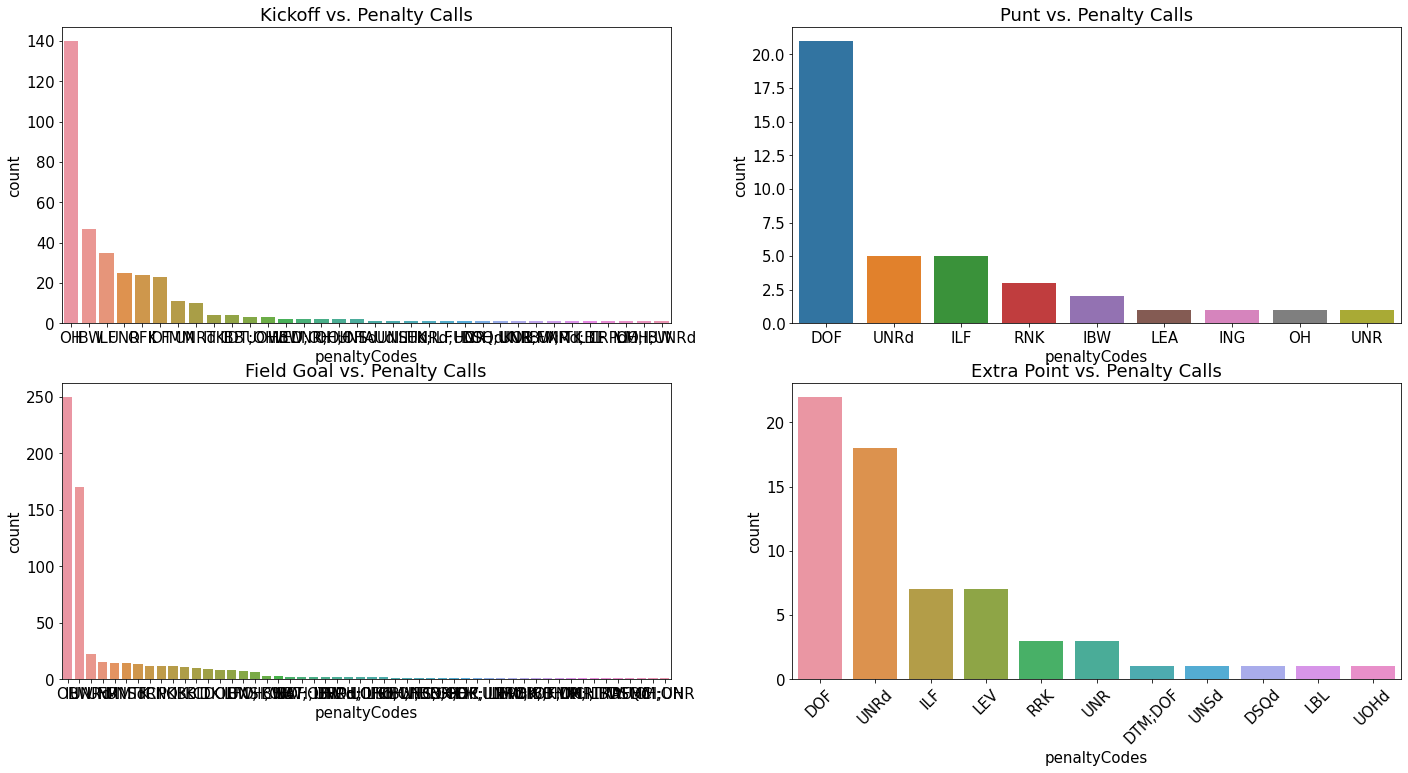

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
r,c = 0,0
for i in spteam_type:
    sns.countplot(data=i,x='penaltyCodes',order = i['penaltyCodes'].value_counts().index,ax=ax[r, c])
    plt.xticks(rotation=45)

    r += 1
    if r >1:
        c +=1
        r = 0
        
ax[0,0].set_title("Kickoff vs. Penalty Calls")
ax[0,1].set_title("Punt vs. Penalty Calls")
ax[1,0].set_title("Field Goal vs. Penalty Calls")
ax[1,1].set_title("Extra Point vs. Penalty Calls")
plt.show()

time: Time stamp of play (time, yyyy-mm-dd, hh:mm:ss)

x: Player position along the long axis of the field, 0 - 120 yards. See Figure 1 below. (numeric)

y: Player position along the short axis of the field, 0 - 53.3 yards. See Figure 1 below. (numeric)

s: Speed in yards/second (numeric)

a: Speed in yards/second^2 (numeric)

dis: Distance traveled from prior time point, in yards (numeric)

o: Player orientation (deg), 0 - 360 degrees (numeric)

dir: Angle of player motion (deg), 0 - 360 degrees (numeric)

event: Tagged play details, including moment of ball snap, pass release, pass catch, tackle, etc (text)

nflId: Player identification number, unique across players (numeric)
displayName: Player name (text)

jerseyNumber: Jersey number of player (numeric)

position: Player position group (text)

team: Team (away or home) of corresponding player (text)

frameId: Frame identifier for each play, starting at 1 (numeric)

gameId: Game identifier, unique (numeric)

playId: Play identifier, not unique across games (numeric)

playDirection: Direction that the offense is moving (left or right)

In [68]:
resumetable(data_track_2018)

Shape : (12777351, 18)


,Feature,Data Type,Num of null,Num of unique,First value,Second value,Third value
0,time,object,0,525791,2018-12-30T21:25:32.200,2018-12-30T21:25:32.300,2018-12-30T21:25:32.400
1,x,float64,0,15176,41.32,41.68,42.05
2,y,float64,0,7090,29.45,29.17,28.88
3,s,float64,0,3634,4.36,4.59,4.74
4,a,float64,0,3139,1.33,1.24,0.99
5,dis,float64,0,965,0.43,0.45,0.47
6,o,float64,555537,36001,130.42,128.59,124.47
7,dir,float64,555537,36001,128.44,127.81,128.15
8,event,object,0,58,None,None,None
9,nflId,float64,555537,1769,39470.00,39470.00,39470.00


In [69]:
data_track_2018.event.unique()

array(['None', 'kickoff', 'kick_received', 'first_contact', 'tackle',
       'ball_snap', 'field_goal_attempt', 'field_goal', 'touchback',
       'extra_point_attempt', 'extra_point', 'punt', 'fair_catch',
       'line_set', 'punt_land', 'punt_downed', 'field_goal_missed',
       'punt_received', 'kickoff_land', 'out_of_bounds',
       'field_goal_play', 'field_goal_fake', 'pass_forward',
       'pass_arrived', 'pass_outcome_touchdown', 'fumble',
       'fumble_offense_recovered', 'punt_muffed',
       'fumble_defense_recovered', 'extra_point_missed', 'handoff',
       'punt_fake', 'pass_outcome_caught', 'onside_kick', 'kickoff_play',
       'drop_kick', 'punt_blocked', 'kick_recovered', 'touchdown',
       'penalty_flag', 'field_goal_blocked', 'run', 'xp_fake',
       'extra_point_fake', 'pass_outcome_incomplete', 'punt_play',
       'huddle_break_offense', 'snap_direct', 'lateral', 'man_in_motion',
       'safety', 'free_kick', 'extra_point_blocked',
       'two_point_conversion', 'f

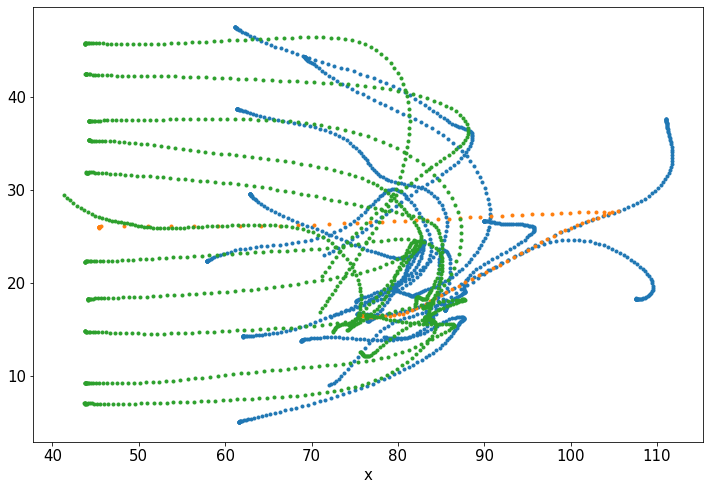

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))
data_track_2018.query('gameId == 2018123000 and playId == 36').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove()

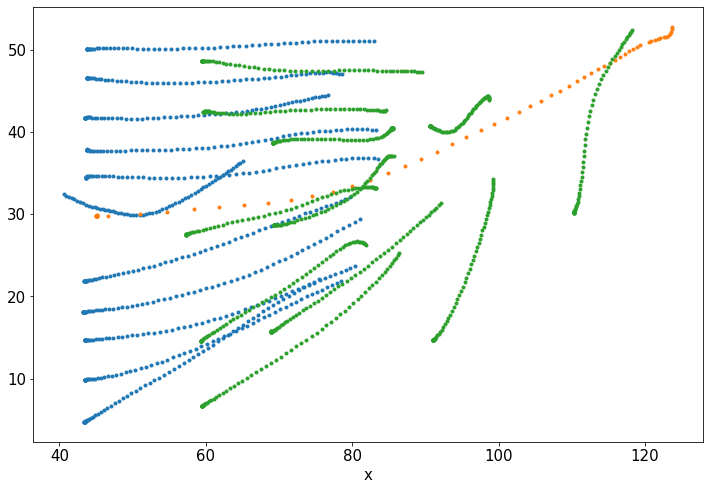

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))
data_track_2018.query('gameId == 2018091001 and playId == 4033').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove();

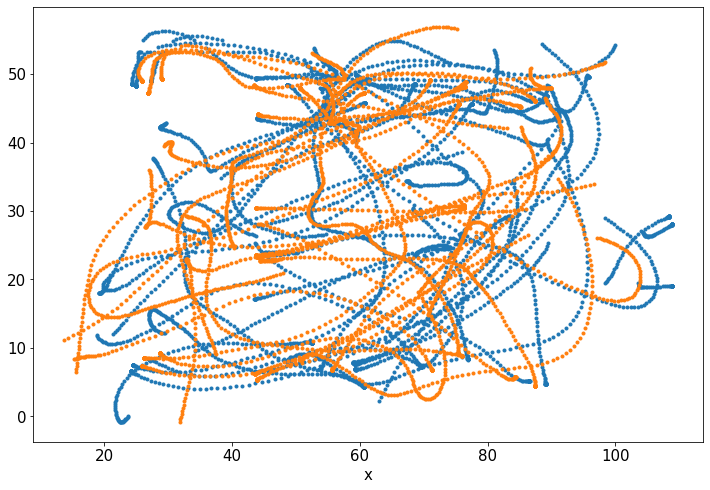

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))
data_track_2018.query('gameId == 2018091609 and position == "CB"').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove();

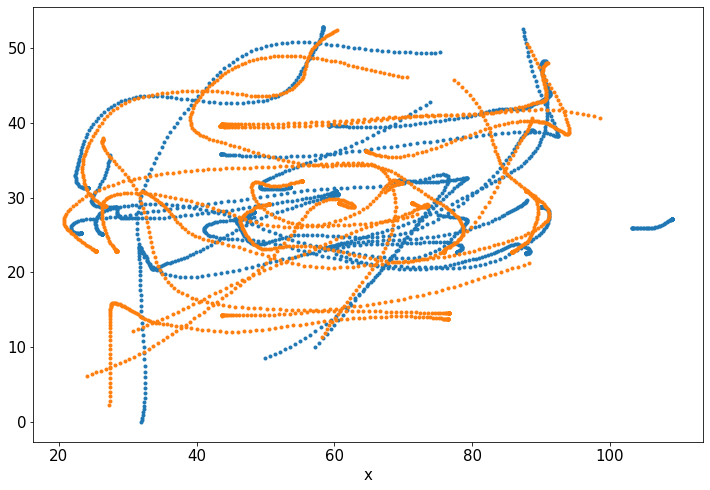

In [73]:
fig, ax = plt.subplots(figsize=(12, 8))
data_track_2018.query('gameId == 2018091609 and position == "LB"').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove()

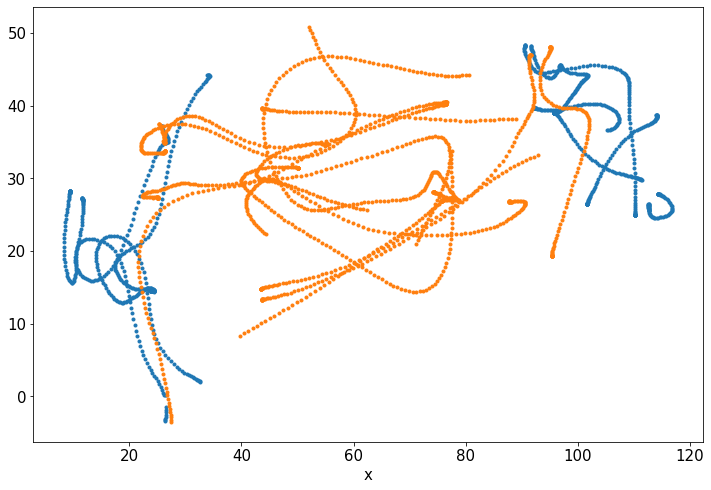

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))
data_track_2018.query('gameId == 2018091609 and position == "RB"').groupby('team') \
    .plot(x='x', y='y', ax=ax, style='.')
plt.legend().remove();

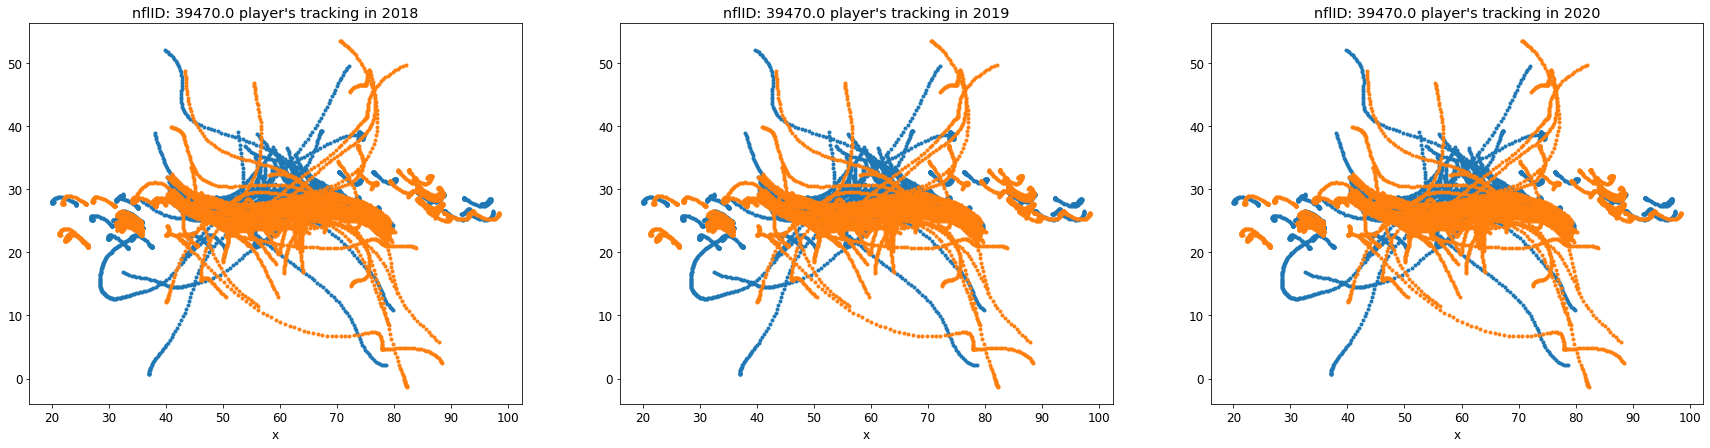

In [75]:
import matplotlib.gridspec as gridspec 

mpl.rc('font', size=12)
grid = gridspec.GridSpec(1, 3) # Arrange the graph (subplot) in 3 rows and 2 rows
plt.figure(figsize=(30, 7))  # Set the size of the entire fiture

nflID = 39470.0
tracking_dfs = [data_track_2018, data_track_2019, data_track_2020] # 피처 목록
year = 2018

for idx, tracking_df in enumerate(tracking_dfs): 
    ax = plt.subplot(grid[idx])
    
    data_track_2018.query(f'nflId == {nflID}').groupby('team') \
        .plot(x='x', y='y', ax=ax, style='.')
    
    plt.legend().remove()
    ax.set_title(f'nflID: {nflID} player\'s tracking in {year}')
    year += 1


In [76]:
data_track_2018.query(f'nflId == {nflID}').groupby('team').sum()

,x,y,s,a,dis,o,dir,nflId,jerseyNumber,frameId,gameId,playId
team,,,,,,,,,,,,
away,304844.12,142073.63,15451.95,7156.79,1552.80,1034691.82,1040151.90,206704390.0,47133.0,197151,10568826463183,11993729
home,380932.32,166273.13,19506.80,8988.51,1961.34,1188930.99,1201912.09,250042450.0,57015.0,259004,12784707297583,12129876


In [82]:
kickoff_df.to_csv('data/kickoffs.csv',index=False)
punt_df.to_csv('data/punts.csv',index=False)
fg_df.to_csv('data/field_goal.csv',index=False)
extra_df.to_csv('data/extra_points.csv',index=False)

In [78]:
## KICKOFFS